# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [80]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities_df = pd.DataFrame(cities)
cities_df = cities_df.rename(columns={0:"City"})
cities_df

,City
0,hermanus
1,tuktoyaktuk
2,dikson
3,saquarema
4,kristiansund
...,...
613,payson
614,chortomlyk
615,valentin gomez farias
616,boden


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
# Crate base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# create new columns to hold weather data
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""

# snaphot of initial DataFrame
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,,,,,,,,
1,tuktoyaktuk,,,,,,,,
2,dikson,,,,,,,,
3,saquarema,,,,,,,,
4,kristiansund,,,,,,,,
...,...,...,...,...,...,...,...,...,...
613,payson,,,,,,,,
614,chortomlyk,,,,,,,,
615,valentin gomez farias,,,,,,,,
616,boden,,,,,,,,


In [44]:
# iterate through the cities_df to retrieve weather data
for index,row in cities_df.iterrows():
    # get the city name
    city_name = row["City"]
    set_number = (index / 200) + 1

    # make API request and print the result
    print(f"Processing record of {index} of Set {round(set_number,0)}| {city_name}")
    response = requests.get(query_url + city_name).json()

    try:
        cities_df.loc[index,"Lat"] = response["coord"]["lat"]
        cities_df.loc[index,"Lng"] = response["coord"]["lon"]
        cities_df.loc[index,"Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index,"Humidity"] = response["main"]["humidity"]
        cities_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index,"Wind Speed"] = response["wind"]["speed"]
        cities_df.loc[index,"Country"] = response["sys"]["country"]
        cities_df.loc[index,"Date"] = response["dt"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

Processing record of 0 of Set 1.0| hermanus
------------
Processing record of 1 of Set 1.0| tuktoyaktuk
------------
Processing record of 2 of Set 1.0| dikson
------------
Processing record of 3 of Set 1.0| saquarema
------------
Processing record of 4 of Set 1.0| kristiansund
------------
Processing record of 5 of Set 1.0| jamestown
------------
Processing record of 6 of Set 1.0| albany
------------
Processing record of 7 of Set 1.0| yellowknife
------------
Processing record of 8 of Set 1.0| nikolskoye
------------
Processing record of 9 of Set 1.0| cherskiy
------------
Processing record of 10 of Set 1.0| miguel calmon
------------
Processing record of 11 of Set 1.0| rikitea
------------
Processing record of 12 of Set 1.0| bintulu
------------
Processing record of 13 of Set 1.0| ranfurly
------------
Processing record of 14 of Set 1.0| calbuco
------------
Processing record of 15 of Set 1.0| karpuninskiy
Missing field/result... skipping.
------------
Processing record of 16 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
# export data to CSV
cities_df.to_csv(output_data_file,index=True,header=True)

# display the result in DataFrame
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,79.81,70,70,11.99,ZA,1647768368
1,tuktoyaktuk,69.4541,-133.0374,-23.93,100,92,5.68,CA,1647768418
2,dikson,73.5069,80.5464,6.71,96,74,8.57,RU,1647768419
3,saquarema,-22.92,-42.5103,73.44,86,98,3.89,BR,1647768381
4,kristiansund,63.1115,7.732,45.25,70,0,2.3,NO,1647768420
...,...,...,...,...,...,...,...,...,...
613,payson,40.0444,-111.7321,50.83,38,75,9.22,US,1647768404
614,chortomlyk,47.6232,34.142,38.1,36,4,11.68,UA,1647768668
615,valentin gomez farias,28.2167,-106.5833,48.22,29,0,1.07,MX,1647768668
616,boden,65.8252,21.6886,46.4,66,100,7.29,SE,1647768668


In [53]:
#check data completeness
cities_df.count()

City          618
Lat           618
Lng           618
Max Temp      618
Humidity      618
Cloudiness    618
Wind Speed    618
Country       618
Date          618
dtype: int64

In [54]:
#check data type
cities_df.dtypes

City          object
Lat           object
Lng           object
Max Temp      object
Humidity      object
Cloudiness    object
Wind Speed    object
Country       object
Date          object
dtype: object

In [63]:
# convert weather numeric data from string to float
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"],errors="coerce")
cities_df["Lng"] = pd.to_numeric(cities_df["Lng"],errors="coerce")
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"],errors="coerce")
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"],errors="coerce")
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"],errors="coerce")
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"],errors="coerce")
cities_df["Date"] = pd.to_numeric(cities_df["Date"],errors="coerce")
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

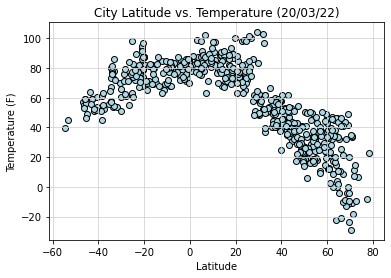

In [126]:
# create scatter plot Temperature v Latitude
x_lat = cities_df["Lat"]
y_temp = cities_df["Max Temp"]
plt.scatter(x_lat,y_temp,edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Temperature (20/03/22)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)",)
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Charts/Lat_vs_Temp.png")

## Latitude vs. Humidity Plot

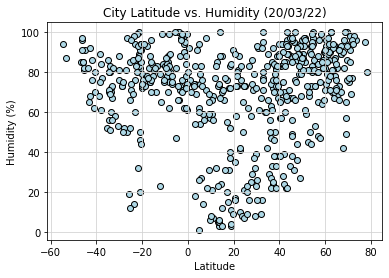

In [71]:
# create scatter plot: Humidity v Latitude
y_humid=cities_df["Humidity"]
plt.scatter(x_lat,y_humid,edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Humidity (20/03/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Charts/Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

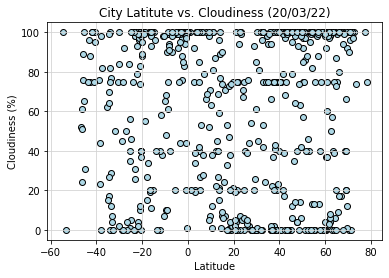

In [72]:
# create scatter plot: Cloudiness v Latitude
y_cloud=cities_df["Cloudiness"]
plt.scatter(x_lat,y_cloud,edgecolors="black",facecolors="lightblue")
plt.title("City Latitute vs. Cloudiness (20/03/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Charts/Lat_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

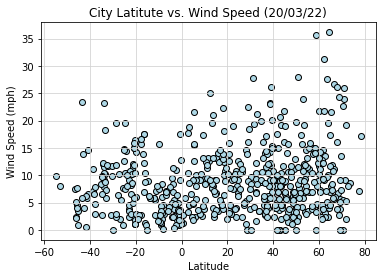

In [73]:
# create scatter plot: Wind Speed v Latitude
y_wind=cities_df["Wind Speed"]
plt.scatter(x_lat,y_wind,edgecolors="black",facecolors="lightblue")
plt.title("City Latitute vs. Wind Speed (20/03/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Charts/Lat_vs_WinSpeed.png")

## Linear Regression

In [79]:
# create southern & northern hemisphere dataframe
south_df = pd.DataFrame(cities_df.loc[cities_df["Lat"]<0,:])
north_df = pd.DataFrame(cities_df.loc[cities_df["Lat"]>=0,:])


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,tuktoyaktuk,69.4541,-133.0374,-23.93,100.0,92.0,5.68,CA,1.647768e+09
2,dikson,73.5069,80.5464,6.71,96.0,74.0,8.57,RU,1.647768e+09
4,kristiansund,63.1115,7.7320,45.25,70.0,0.0,2.30,NO,1.647768e+09
5,jamestown,42.0970,-79.2353,39.02,70.0,100.0,14.97,US,1.647768e+09
6,albany,42.6001,-73.9662,49.73,94.0,68.0,5.68,US,1.647768e+09
...,...,...,...,...,...,...,...,...,...
613,payson,40.0444,-111.7321,50.83,38.0,75.0,9.22,US,1.647768e+09
614,chortomlyk,47.6232,34.1420,38.10,36.0,4.0,11.68,UA,1.647769e+09
615,valentin gomez farias,28.2167,-106.5833,48.22,29.0,0.0,1.07,MX,1.647769e+09
616,boden,65.8252,21.6886,46.40,66.0,100.0,7.29,SE,1.647769e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation coefficient between latitude and temperature in Northern hemisphere is -0.87


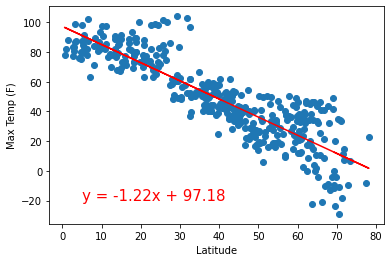

In [127]:
# Calculate correlation coefficient
x_north = north_df["Lat"]
y_north = north_df["Max Temp"]
north_corr_coeff = st.pearsonr(x_north,y_north)
print(f'Correlation coefficient between latitude and temperature in Northern hemisphere is {round(north_corr_coeff[0],2)}')

# Calculate linear regression
(north_slope,north_intercept,north_rvalue,north_pvalue,north_stderr) = linregress(x_north,y_north)
north_regress_values = x_north * north_slope + north_intercept
north_line_eq = "y = " + str(round(north_slope,2)) + "x + " + str(round(north_intercept,2))
plt.scatter(x_north,y_north)
plt.plot(x_north,north_regress_values,"r-")
plt.annotate(north_line_eq,(5,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Charts/north_linereg_temp.png")
plt.show() 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation coefficient between latitude and temperature in Southern hemisphere is 0.65


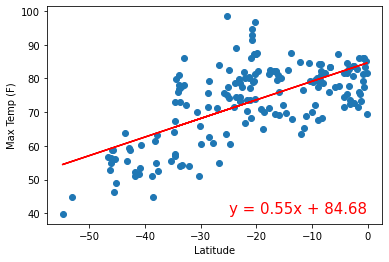

In [128]:
# Calculate correlation coefficient
x_south = south_df["Lat"]
y_south = south_df["Max Temp"]
south_corr_coeff = st.pearsonr(x_south,y_south)
print(f'Correlation coefficient between latitude and temperature in Southern hemisphere is {round(south_corr_coeff[0],2)}')

# Calculate linear regression
(south_slope,south_intercept,south_rvalue,south_pvalue,south_stderr) = linregress(x_south,y_south)
south_regress_values = x_south * south_slope + south_intercept
south_line_eq = "y = " + str(round(south_slope,2)) + "x + " + str(round(south_intercept,2))
plt.scatter(x_south,y_south)
plt.plot(x_south,south_regress_values,"r-")
plt.annotate(south_line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Charts/south_linereg_temp.png")
plt.show()


- Strong correlation between latitude and maximum temperature as the values are more than 0.5 (absolute value) for both hemispheres . Stronger correlation is found in Northern, with correlation coefficient of 0.87.

- Linear Regressions are showing lower temperature as the cities move further from the equator (latitude = 0). Stronger slope is found in Northern hemisphere (1.22). However, this may due to the lack of data of cities available in Southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation coefficient between humidity and latitude in Northern hemisphere is 0.45


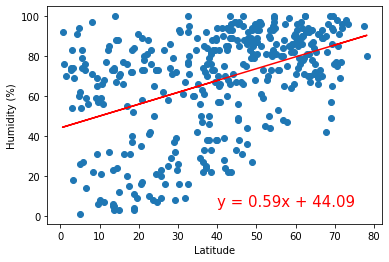

In [135]:
# Calculate correlation coefficient
x_north_humid = north_df["Lat"]
y_north_humid = north_df["Humidity"]
north_humid_corr_coeff = st.pearsonr(x_north_humid,y_north_humid)
print(f'Correlation coefficient between humidity and latitude in Northern hemisphere is {round(north_humid_corr_coeff[0],2)}')

# Calculate linear regression
(north_humid_slope,north_humid_intercept,north_humid_rvalue,north_humid_pvalue,north_humid_stderr) = linregress(x_north_humid,y_north_humid)
north_humid_regress_values = x_north_humid * north_humid_slope + north_humid_intercept
north_humid_line_eq = "y = " + str(round(north_humid_slope,2)) + "x + " + str(round(north_humid_intercept,2))
plt.scatter(x_north_humid,y_north_humid)
plt.plot(x_north_humid,north_humid_regress_values,"r-")
plt.annotate(north_humid_line_eq,(40,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Charts/north_linereg_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation coefficient between humidity and latitude in Southern hemisphere is 0.08


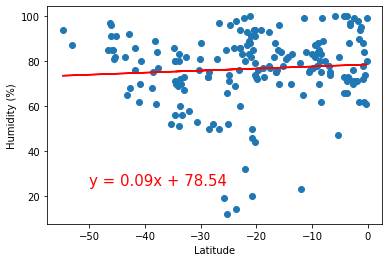

In [136]:
# Calculate correlation coefficient
x_south_humid = south_df["Lat"]
y_south_humid = south_df["Humidity"]
south_humid_corr_coeff = st.pearsonr(x_south_humid,y_south_humid)
print(f'Correlation coefficient between humidity and latitude in Southern hemisphere is {round(south_humid_corr_coeff[0],2)}')

# Calculate linear regression
(south_humid_slope,south_humid_intercept,south_humid_rvalue,south_humid_pvalue,south_humid_stderr) = linregress(x_south_humid,y_south_humid)
south_humid_regress_values = x_south_humid * south_humid_slope + south_humid_intercept
south_humid_line_eq = "y = " + str(round(south_humid_slope,2)) + "x + " + str(round(south_humid_intercept,2))
plt.scatter(x_south_humid,y_south_humid)
plt.plot(x_south_humid,south_humid_regress_values,"r-")
plt.annotate(south_humid_line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Charts/south_linereg_humidity.png")
plt.show()

- Moderate correlation between latitude and humidity in Northern hemisphere (with correlation coefficient of 0.45). The weaker correalition is found in the Southern hemisphere (with the coefficient of 0.08).

- In Northern hemisphere, linear regression shows higher humidity as the cities located further from the equator (lat=0) with slope of 0.59;  This may due to the current season in the hemisphere.

- In Southern hemisphere, humidity tend to be at the same level across different lattitude; as also shown by linear regression slope of 0.09.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation coefficient between cloudiness and latitude in Northern hemisphere is 0.17


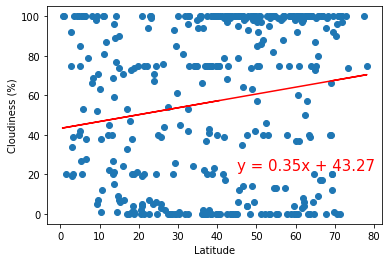

In [137]:
# Calculate correlation coefficient
x_north_cloud = north_df["Lat"]
y_north_cloud = north_df["Cloudiness"]
north_cloud_corr_coeff = st.pearsonr(x_north_cloud,y_north_cloud)
print(f'Correlation coefficient between cloudiness and latitude in Northern hemisphere is {round(north_cloud_corr_coeff[0],2)}')

# Calculate linear regression
(north_cloud_slope,north_cloud_intercept,north_cloud_rvalue,north_cloud_pvalue,north_cloud_stderr) = linregress(x_north_cloud,y_north_cloud)
north_cloud_regress_values = x_north_cloud * north_cloud_slope + north_cloud_intercept
north_cloud_line_eq = "y = " + str(round(north_cloud_slope,2)) + "x + " + str(round(north_cloud_intercept,2))
plt.scatter(x_north_cloud,y_north_cloud)
plt.plot(x_north_cloud,north_cloud_regress_values,"r-")
plt.annotate(north_cloud_line_eq,(45,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Charts/north_linereg_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation coefficient between cloudiness and latitude in Southern hemisphere is 0.22


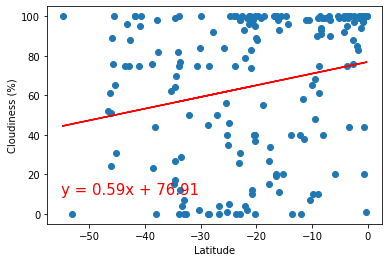

In [138]:
# Calculate correlation coefficient
x_south_cloud = south_df["Lat"]
y_south_cloud = south_df["Cloudiness"]
south_cloud_corr_coeff = st.pearsonr(x_south_cloud,y_south_cloud)
print(f'Correlation coefficient between cloudiness and latitude in Southern hemisphere is {round(south_cloud_corr_coeff[0],2)}')

# Calculate linear regression
(south_cloud_slope,south_cloud_intercept,south_cloud_rvalue,south_cloud_pvalue,south_cloud_stderr) = linregress(x_south_cloud,y_south_cloud)
south_cloud_regress_values = x_south_cloud * south_cloud_slope + south_cloud_intercept
south_cloud_line_eq = "y = " + str(round(south_cloud_slope,2)) + "x + " + str(round(south_cloud_intercept,2))
plt.scatter(x_south_cloud,y_south_cloud)
plt.plot(x_south_cloud,south_cloud_regress_values,"r-")
plt.annotate(south_cloud_line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Charts/south_linereg_cloudiness.png")
plt.show()

- Lattitude does not tend to impact cities cloudiness in both hemisphere. This is shown by weak correlation coefficient 0f 0.17 (northern) and 0.22 (southern)

- Linear regression shows positive slope in both hemispheres. Higher cloudiness is taking place with latitude. This may due to the hotter in the northern region (higher latitude value).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation coefficient between wind speed and latitude in Northern hemisphere is 0.09


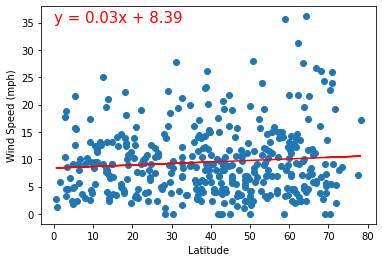

In [139]:
# Calculate correlation coefficient
x_north_wind = north_df["Lat"]
y_north_wind = north_df["Wind Speed"]
north_wind_corr_coeff = st.pearsonr(x_north_wind,y_north_wind)
print(f'Correlation coefficient between wind speed and latitude in Northern hemisphere is {round(north_wind_corr_coeff[0],2)}')

# Calculate linear regression
(north_wind_slope,north_wind_intercept,north_wind_rvalue,north_wind_pvalue,north_wind_stderr) = linregress(x_north_wind,y_north_wind)
north_wind_regress_values = x_north_wind * north_wind_slope + north_wind_intercept
north_wind_line_eq = "y = " + str(round(north_wind_slope,2)) + "x + " + str(round(north_wind_intercept,2))
plt.scatter(x_north_wind,y_north_wind)
plt.plot(x_north_wind,north_wind_regress_values,"r-")
plt.annotate(north_wind_line_eq,(0,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Charts/north_linereg_windspeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation coefficient between wind speed and latitude in Southern hemisphere is -0.22


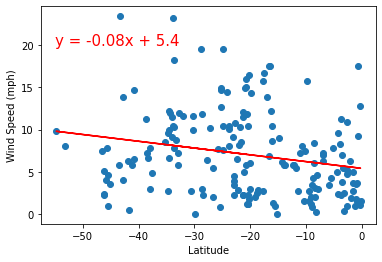

In [140]:
# Calculate correlation coefficient
x_south_wind = south_df["Lat"]
y_south_wind = south_df["Wind Speed"]
south_wind_corr_coeff = st.pearsonr(x_south_wind,y_south_wind)
print(f'Correlation coefficient between wind speed and latitude in Southern hemisphere is {round(south_wind_corr_coeff[0],2)}')

# Calculate linear regression
(south_wind_slope,south_wind_intercept,south_wind_rvalue,south_wind_pvalue,south_wind_stderr) = linregress(x_south_wind,y_south_wind)
south_wind_regress_values = x_south_wind * south_wind_slope + south_wind_intercept
south_wind_line_eq = "y = " + str(round(south_wind_slope,2)) + "x + " + str(round(south_wind_intercept,2))
plt.scatter(x_south_wind,y_south_wind)
plt.plot(x_south_wind,south_wind_regress_values,"r-")
plt.annotate(south_wind_line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Charts/south_linereg_windspeed.png")
plt.show()

- Weak correlations (less than 0.5) between latitude and wind speed in both hemispheres. Latitude does not seem to impact the wind speed.

- Linear regression shows flattening slopes in both hemispheres. Higher wind speed tend to take place as the cities located further from the equator in the Southern Hemisphere, with slope of 0.08 (absolute value).